In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [8]:
# We can view all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

In [9]:
# Save references to each table

engine.execute('SELECT * FROM Measurement').fetchall()
#engine.execute('SELECT * FROM Station LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [10]:
# Create our session (link) from Python to the DB
conn = engine.connect()

# Exploratory Climate Analysis

In [11]:
import datetime as dt

ConversionError: Failed to convert value(s) to axis units: Index(['2016-08-01', '2016-08-08', '2016-08-16', '2016-08-24', '2016-08-31',
       '2016-09-09', '2016-09-16', '2016-09-24', '2016-10-02', '2016-10-10',
       '2016-10-18', '2016-10-26', '2016-11-02', '2016-11-10', '2016-11-18',
       '2016-11-27', '2016-12-04', '2016-12-12', '2016-12-20', '2016-12-28',
       '2017-01-05', '2017-01-13', '2017-01-21', '2017-01-29', '2017-02-06',
       '2017-02-13', '2017-02-22', '2017-03-02', '2017-03-10', '2017-03-18',
       '2017-03-27', '2017-04-03', '2017-04-11', '2017-04-19', '2017-04-27',
       '2017-05-05', '2017-05-15', '2017-05-23', '2017-06-01', '2017-06-09',
       '2017-06-17', '2017-06-25', '2017-07-03', '2017-07-11', '2017-07-19',
       '2017-07-27', '2017-08-06', '2017-08-18'],
      dtype='object', name='date')

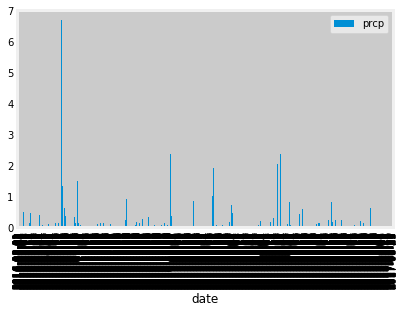

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

lastyearprcp = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= '2016-08-01').all()
lastyearprcp = pd.DataFrame(lastyearprcp)
lastyearprcp = lastyearprcp.fillna(0)
lastyearprcp['date'] = lastyearprcp['date'].astype(str)
lastyearprcp = lastyearprcp.sort_values(by='date', ascending=True)
lastyearprcp = lastyearprcp.set_index('date')

index = lastyearprcp.index
index


#tired to make a for loop where i pulled the first of every month to use for the xaxis

#firstofmonth = []
#monthbegin = " "
#currentmonth = lastyearprcp['date'].str.split('-').str[1]
#lastmonth = 0

#for date in lastyearprcp['date']:
#    monthbegin = date
#    currentmonth = monthbegin.split('-')[1]
#    if currentmonth == lastmonth:
#        lastmonth = currentmonth
#    elif currentmonth != lastmonth:
#        firstofmonth.append(monthbegin)
#        lastmonth = currentmonth

lastyearprcp.plot(kind='bar')
plt.xticks(index [::50], rotation='vertical')
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcpdata = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
prcpdata = pd.DataFrame(prcpdata)
prcpdata.describe()

,prcp,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [14]:
# Design a query to show how many stations are available in this dataset?
measurestationcount = session.query(Measurement.station).all()
measurestationcount = pd.DataFrame(measurestationcount)
measurestationcount['station'].unique()

stationcount = session.query(Station.station).count()
stationcount

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
tempdata = session.query(Measurement.station, Measurement.tobs).all()
tempdata = pd.DataFrame(tempdata)
tempdata_gb = tempdata.groupby('station', as_index=False)['tobs'].count()
tempdata_gb = tempdata_gb.sort_values(by='tobs', ascending=False)
tempdata_gb

,station,tobs
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
activestation = tempdata.loc[tempdata['station'] == 'USC00519281']
print(activestation['tobs'].max())
print(activestation['tobs'].min())
print(activestation['tobs'].mean())


max = [func.max(Measurement.tobs)] 
min = [func.min(Measurement.tobs)]
avg = [func.avg(Measurement.tobs)]

maxstationtemp = session.query(*max).filter(Measurement.station == 'USC00519281').all()
minstationtemp = session.query(*min).filter(Measurement.station == 'USC00519281').all()
avgstationtemp = session.query(*avg).filter(Measurement.station == 'USC00519281').all()

print("max temp TOBS:", maxstationtemp)
print("min temp TOBS:", minstationtemp)
print("avg temp TOBS:", avgstationtemp)

85.0
54.0
71.66378066378067
max temp TOBS: [(85.0,)]
min temp TOBS: [(54.0,)]
avg temp TOBS: [(71.66378066378067,)]


In [54]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highstationactivity = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-01').filter(Measurement.station == 'USC00519281')

for line in highstationactivity:
    print(line.date, line.tobs)

2016-08-01 76.0
2016-08-02 76.0
2016-08-03 77.0
2016-08-04 77.0
2016-08-05 81.0
2016-08-06 78.0
2016-08-07 78.0
2016-08-08 81.0
2016-08-09 81.0
2016-08-10 82.0
2016-08-11 80.0
2016-08-12 76.0
2016-08-13 80.0
2016-08-14 76.0
2016-08-15 75.0
2016-08-16 74.0
2016-08-17 82.0
2016-08-18 80.0
2016-08-19 79.0
2016-08-20 81.0
2016-08-21 79.0
2016-08-22 78.0
2016-08-23 77.0
2016-08-24 77.0
2016-08-25 80.0
2016-08-26 80.0
2016-08-27 75.0
2016-08-28 73.0
2016-08-29 78.0
2016-08-30 77.0
2016-08-31 78.0
2016-09-01 80.0
2016-09-02 80.0
2016-09-03 78.0
2016-09-04 78.0
2016-09-05 78.0
2016-09-06 73.0
2016-09-07 74.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 77.0
2016-09-11 80.0
2016-09-12 76.0
2016-09-13 79.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 78.0
2016-09-17 79.0
2016-09-18 78.0
2016-09-19 78.0
2016-09-20 76.0
2016-09-21 74.0
2016-09-22 77.0
2016-09-23 78.0
2016-09-24 79.0
2016-09-25 79.0
2016-09-26 77.0
2016-09-27 80.0
2016-09-28 78.0
2016-09-29 78.0
2016-09-30 78.0
2016-10-01 77.0
2016-10-

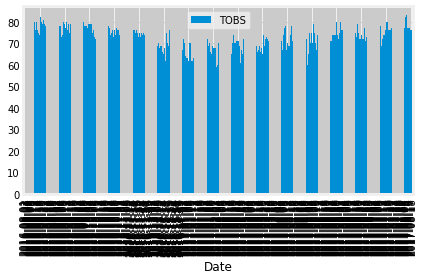

In [57]:
histogram = pd.DataFrame(highstationactivity, columns=['Date', 'TOBS'])
histogram.set_index('Date', inplace=True)

histogram.plot.bar()
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
